In [1]:
import pandas as pd ; import networkx as nx ; import ast ; import matplotlib.pyplot as plt ; import numpy as np ;
import nltk ; from wordcloud import WordCloud, ImageColorGenerator ; from PIL import Image ; import urllib.request ;
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS ; from collections import Counter ; import seaborn as sns ;


In [2]:
%matplotlib inline
sns.set()

In [3]:
# Dataframe of Characters
df_characters = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_characters_wRelationsAndAttributes_final.csv")
#df_characters = df_characters.drop('Unnamed: 0', axis=1)
df_char_degr = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/df_characters_with_attr_and_communities.csv')
# Dataframe of Episodes
df_episodes = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_episodes.csv')
# Dataframe of Transcripts
df_transcripts = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/transcripts/RickAndMortyScripts.csv")
# Dataframe of Sentiments of words
df_nrc = pd.read_csv("https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/NRC.csv")
df_nrc_01 = pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/lexicons/NRC_sentiment_lexicon.csv')

In [4]:
# df_characters[df_characters['Name'].str.contains('Rick')].sort_values(by='degree', ascending = False)[:30]

In [5]:
#pd.set_option('display.max_rows', 550)

In [6]:
df_transcripts["name"].replace({"Rick": "Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Evil Rick": "Evil Rick Sanchez"}, inplace=True)
df_transcripts["name"].replace({"Pickle Rick": "Pickle Rick (character)"}, inplace=True)
df_transcripts["name"].replace({"Morty": "Morty Smith"}, inplace=True)
df_transcripts["name"].replace({"Beth": "Beth Smith"}, inplace=True)
df_transcripts["name"].replace({"Jerry": "Jerry Smith"}, inplace=True)
df_transcripts["name"].replace({"Summer": "Summer Smith"}, inplace=True)
df_transcripts["name"].replace({"'Rick D716-B": "Rick D716-B"}, inplace=True)



In [7]:
df_charLines = df_transcripts.groupby(['name'], as_index = False).agg({'line': ' '.join})

#Remove stopwords
df_charLines.line = df_charLines.line.apply(lambda x: remove_stopwords(x))

In [8]:
characters_dialogue = df_charLines.set_index('name').T.to_dict('records')[0]



In [9]:
# df_charLines[df_charLines.name.isin(['Rick Sanchez', 'Evil Rick Sanchez', 'Memory Rick', 'Rick Sanchez (Replacement Dimension)', 'Doofus Rick', 'Tiny Rick', 'Cronenberg Rick', 'Pickle Rick (character)', 'Toxic Rick'])]

In [10]:
#Find the episodes where each one of Ricks appears:
# RicksAppear = {'Evil Rick Sanchez': ["Close Rick-counters of the Rick Kind", "Tales from the Citadel", "Rickmurai Jack"], 'Rick Sanchez (Replacement Dimension)': ["Rick Potion #9"], 'Doofus Rick': ["Close Rick-Counters of the Rick Kind", "The Rickshank Rickdemption"], 'Pickle Rick (character)':["Pickle Rick", "Edge of Tomorty: Rick Die Rickpeat"], 'Cronenberg Rick': ["Rick Potion #9", "Close Rick-counters of the Rick Kind"], 'Toxic Rick': ["Rest and Ricklaxation"]}    

In [11]:
# df_transcripts[df_transcripts['episode name'].isin(["Pickle Rick", "Edge of Tomorty: Rick Die Rickpeat"])].name.unique()

In [12]:
# pd.set_option('display.max_rows', 2000)

# df_transcripts[df_transcripts['episode no.'] == 7]

In [13]:
# Save as a csv
#df_charLines.to_csv('df_char_lines.csv', index=False)

In [14]:
# df_charLines[df_charLines.name.isin(['Doofus Rick', 'Evil Rick Sanchez', 'Pickle Rick', 'Rick Sanchez', 'Toxic Rick'])]

In [15]:
# #Remove stopwords
# df_Ricks_Lines.line = df_Ricks_Lines.line.apply(lambda x: remove_stopwords(x))

# df_Ricks_Lines

In [16]:
# Ricks_dialogue = {k: v for k, v in characters_dialogue.items() if k in ['Doofus Rick', 'Evil Rick Sanchez', 'Pickle Rick', 'Rick Sanchez', 'Toxic Rick']}

In [17]:
# df_transcripts['line_index'] = df_transcripts.index
# df_transcripts

In [18]:
# ###VADER METHOD FOR SENTIMENT ANALYSIS

# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # calculate the VADER sentiment score for each character

# analyzer = SentimentIntensityAnalyzer()



# def calculate_VADER_of_a_node(aRow, aDialogueDict):
#     if (aRow['season no.'], aRow['episode no.'], aRow['episode name']) in list(aDialogueDict.keys()):
#         vader_score_list.append(analyzer.polarity_scores(characters_dialogue[aRow.Name])['compound'])
#         #vader_score_list.append(np.mean([analyzer.polarity_scores(aSentence)['compound'] for aSentence in aDialogueDict[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])]]))
#     else:
#         vader_score_list.append(None)  
        


In [19]:
df_episode_lines = df_transcripts.groupby(['season no.', 'episode no.', 'episode name', 'name'], as_index = False).agg({'line': ' '.join})
df_episode_lines.line = df_episode_lines.line.apply(lambda x: remove_stopwords(x))
df_episode_lines

,season no.,episode no.,episode name,name,line
0,1,1,Pilot,Announcer,The glarp zone flarping unglarping only. The g...
1,1,1,Pilot,Beth Smith,"Morty, getting sick? I told practice-kiss livi..."
2,1,1,Pilot,Jerry Smith,I there's new episode singing tonight. Who guy...
3,1,1,Pilot,Jessica,"Hi, Morty. Can I you? You know I named these? ..."
4,1,1,Pilot,Morty Smith,"What, Rick? What’s going on? It's middle night..."
...,...,...,...,...,...
573,5,10,Rickmurai Jack,Toddler Morty 1,I like crayons.
574,5,10,Rickmurai Jack,Toddler Morty 2,Girls gross.
575,5,10,Rickmurai Jack,Twenty-Six Year Old Morty,I’m ready sell out. S-something unfair’s happe...
576,5,10,Rickmurai Jack,Two crows,"Caw, caw, caw. Caw. Caw, caw, caw. Caw, caw. C..."


In [29]:
###VADER METHOD FOR SENTIMENT ANALYSIS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# calculate the VADER sentiment score for each character

analyzer = SentimentIntensityAnalyzer()



def calculate_VADER_of_a_character_by_episode(aRow, aDialogueDict):
    if (aRow['season no.'], aRow['episode no.'], aRow['episode name']) in list(aDialogueDict.keys()):
        #print(analyzer.polarity_scores(aDialogueDict[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])])['compound'])
        vader_score_list.append(analyzer.polarity_scores(aDialogueDict[(aRow['season no.'], aRow['episode no.'], aRow['episode name'])])['compound'])
    else:
        vader_score_list.append(None)  

In [30]:
# df_Ricks_lines = df_episode_lines[df_episode_lines.name == 'Rick Sanchez']# .drop('name', axis=1)


In [31]:
# Ricks_dialogue = df_Ricks_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

In [32]:
# vader_score_list = []
# _ = df_Ricks_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Ricks_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Ricks_lines['VADER_score']=vader_score_list
# print(vader_score_list)
# df_VADER_Rick = df_Ricks_lines[df_Ricks_lines.VADER_score.notnull()]
# df_VADER_Rick

In [33]:
def character_evolvement_VADER(name): 
    
    df_aChar_lines = df_episode_lines[df_episode_lines.name == name ]
    aChar_dialogue = df_aChar_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

    df_aChar_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, aChar_dialogue), axis = 1)

    # store in dataframe as a new column
    df_aChar_lines['VADER_score']=vader_score_ list
    df_VADER_aChar = df_aChar_lines[df_aChar_lines.VADER_score.notnull()]
    
    
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(df_VADER_aChar['episode name'], df_VADER_aChar.VADER_score)
    plt.xticks(rotation=90)
    plt.title(name + "'s sentiments through episodes")
    plt.xlabel("Episodes")
    plt.ylabel("VADER sentiment score")
    plt.show()

# ## RICK'S EVOLVEMENT

# df_Ricks_lines = df_episode_lines[df_episode_lines.name == 'Rick Sanchez']# .drop('name', axis=1)


# Ricks_dialogue = df_Ricks_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

# vader_score_list = []
# _ = df_Ricks_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Ricks_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Ricks_lines['VADER_score']=vader_score_list
# df_VADER_Rick = df_Ricks_lines[df_Ricks_lines.VADER_score.notnull()]
# df_VADER_Rick





# ## MORTY'S EVOLVEMENT

# df_Mortys_lines = df_episode_lines[df_episode_lines.name == 'Morty Smith']# .drop('name', axis=1)
# df_Mortys_lines.line = df_Mortys_lines.line.apply(lambda x: remove_stopwords(x))

# Mortys_dialogue = df_Mortys_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

# vader_score_list = []
# _ = df_Mortys_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Mortys_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Mortys_lines['VADER_score']=vader_score_list
# df_VADER_Morty = df_Mortys_lines[df_Mortys_lines.VADER_score.notnull()]



# ## BETH'S EVOLVEMENT

# df_Beths_lines = df_episode_lines[df_episode_lines.name == 'Beth Smith']# .drop('name', axis=1)
# df_Beths_lines.line = df_Beths_lines.line.apply(lambda x: remove_stopwords(x))

# Beths_dialogue = df_Beths_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

# vader_score_list = []
# _ = df_Beths_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Beths_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Beths_lines['VADER_score']=vader_score_list
# df_VADER_Beth = df_Beths_lines[df_Beths_lines.VADER_score.notnull()]


# ## JERRY'S EVOLVEMENT

# df_Jerrys_lines = df_episode_lines[df_episode_lines.name == 'Jerry Smith']# .drop('name', axis=1)
# df_Jerrys_lines.line = df_Jerrys_lines.line.apply(lambda x: remove_stopwords(x))

# Jerrys_dialogue = df_Jerrys_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

# vader_score_list = []
# _ = df_Jerrys_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Jerrys_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Jerrys_lines['VADER_score']=vader_score_list
# df_VADER_Jerry = df_Jerrys_lines[df_Jerrys_lines.VADER_score.notnull()]


# ## SUMMER'S EVOLVEMENT

# df_Summers_lines = df_episode_lines[df_episode_lines.name == 'Summer Smith']# .drop('name', axis=1)
# df_Summers_lines.line = df_Summers_lines.line.apply(lambda x: remove_stopwords(x))

# Summers_dialogue = df_Summers_lines.set_index(['season no.', 'episode no.', 'episode name']).T.to_dict('list') 

# vader_score_list = []
# _ = df_Summers_lines.apply(lambda x: calculate_VADER_of_a_character_by_episode(x, Summers_dialogue), axis = 1)

# # store in dataframe as a new column
# df_Summers_lines['VADER_score']=vader_score_list
# df_VADER_Summer = df_Summers_lines[df_Summers_lines.VADER_score.notnull()]

C:\Users\alex_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


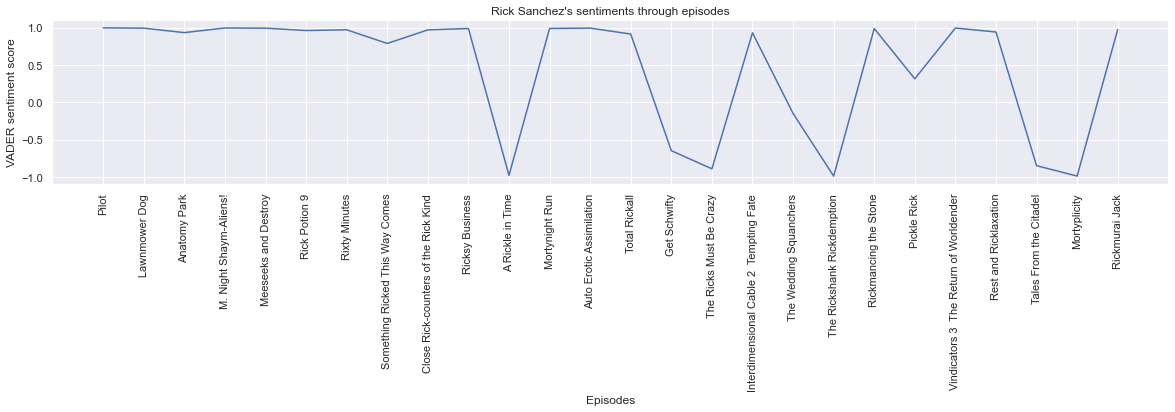

In [37]:
vader_score_list = []
character_evolvement_VADER('Rick Sanchez')

C:\Users\alex_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


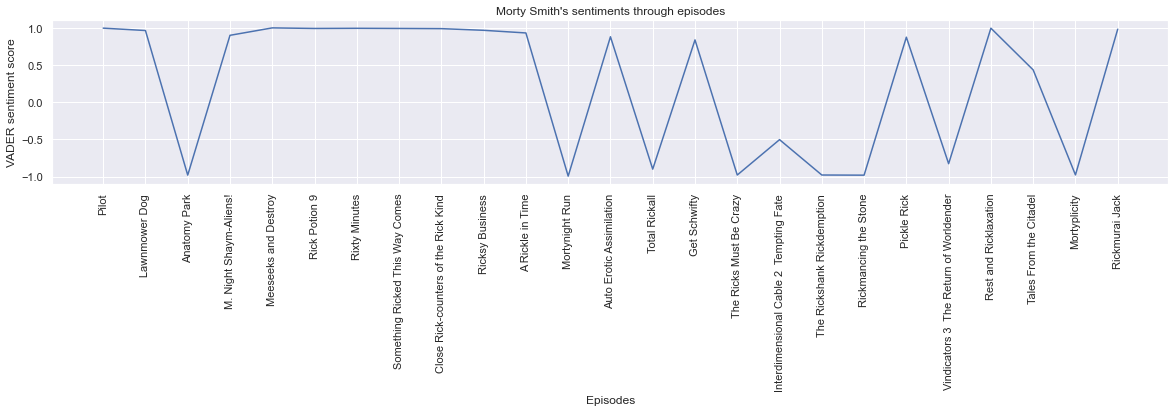

In [38]:
vader_score_list = []
character_evolvement_VADER('Morty Smith')

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Rick['episode name'], df_VADER_Rick.VADER_score)
# plt.xticks(rotation=90)
# plt.title("Rick's sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")
# plt.show()

In [ ]:
# df_transcripts[df_transcripts.name.isin(['Rick Sanchez', 'Doofus Rick', 'Evil Rick Sanchez',  'Pickle Rick (character)', 'Toxic Rick'])].groupby('name').agg('count')

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Morty['episode name'], df_VADER_Morty.VADER_score)
# plt.xticks(rotation=90)
# plt.title("Histogram of Morty's associated sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")
# plt.show()

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Jerry['episode name'], df_VADER_Jerry.VADER_score, 'b')
# plt.plot(df_VADER_Beth['episode name'], df_VADER_Beth.VADER_score, 'r')

# plt.xticks(rotation=90)
# plt.title("Histogram of Beth's and Jerry's associated sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")
# plt.show()


# # # labels = df_VADER_Beth['episode name']
# # # #men_means = [20, 34, 30, 35, 27]
# # # #women_means = [25, 32, 34, 20, 25]


# # # x = np.arange(len(labels))  # the label locations
# # # width = 0.35  # the width of the bars

# # # fig, ax = plt.subplots()
# # # rects1 = ax.bar(x - width/2, df_VADER_Beth.VADER_score, label='Beth')
# # # rects2 = ax.bar(x + width/2, df_VADER_Jerry.VADER_score, label='Jerry')

# # # # Add some text for labels, title and custom x-axis tick labels, etc.
# # # ax.set_ylabel('VADER Score')
# # # ax.set_title('Sentiment analysis through episodes for Beth and Jerry')
# # # ax.set_xticks(labels)
# # # ax.legend()
# # # plt.xticks(rotation=90)

# # # #ax.bar_label(rects1, padding=1)
# # # #ax.bar_label(rects2, padding=1)

# # # fig.tight_layout()

# # # plt.show()


# # plt.rcParams["figure.figsize"] = (20,3)
# # plt.bar(df_VADER_Beth['episode name'],df_VADER_Beth.VADER_score)
# # plt.xticks(rotation=90)
# # plt.title("Beth's sentiments through episodes", )
# # plt.xlabel("Episodes")
# # plt.ylabel("VADER sentiment score")
# # plt.show()

# # # from matplotlib.pyplot import figure


# # # font = {'family' : 'Times New Roman',
# # #         'weight' : 'bold',
# # #         'size'   : 18}

# # # plt.rc('font', **font)

# # # figure(num=None, figsize=(14, 7))

# # # t_1 = df_VADER_Rick.VADER_score
# # # t_2 = df_VADER_Morty.VADER_score
# # # #t_3 = [26794, 39706, 78924, 18066, 8666]
# # # #t_4 = [1491, 2032, 4358, 765, 469]


# # # Labels= df_VADER_Rick['episode name']
# # # y_pos=np.arange(len(Labels))
# # # plt.bar(y_pos + 0, t_1,width=0.2, color = 'navy' , label='test label-1')
# # # plt.bar(y_pos + 0.2,t_2, width=0.2,color = 'skyblue',label = 'test label-2')
# # # #plt.bar(y_pos + 0.4, t_3,width=0.2, color = 'darkcyan' , label='test label-3')
# # # #plt.bar(y_pos + 0.6, t_4,width=0.2, color = 'black' , label='test label-4')

# # # plt.xticks(y_pos, Labels)
# # # #plt.yscale('log')
# # # plt.legend(('Beth','Jerry'))   ##, 'test label-3', 'test label-4'))
# # # plt.ylabel('VADER Score')
# # # plt.xlabel('Episodes')
# # # plt.title("Sentiment analysis through episodes for Beth and Jerry")
# # # plt.show()
# # # # plt.savefig('figure_name.pdf', dpi=300)

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.plot(df_VADER_Jerry['episode name'], df_VADER_Jerry.VADER_score)
# plt.xticks(rotation=90)
# plt.title("Histogram of Jerry's associated sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")
# plt.show()

In [ ]:
# plt.rcParams["figure.figsize"] = (20,3)
# plt.bar(df_VADER_Summer['episode name'], df_VADER_Summer.VADER_score)
# #plt.plot(df_VADER_Summer['episode name'], df_VADER_Summer.VADER_score)
# plt.xticks(rotation=90)
# plt.title("Summer's sentiments through episodes", )
# plt.xlabel("Episodes")
# plt.ylabel("VADER sentiment score")

In [ ]:
# pd.read_csv('https://raw.githubusercontent.com/ThomaSpyrou/SocialGraphsAss1/main/Final%20Project%20-%20Rick%20and%20Morty/RaM_imdb_episodes_ranking.csv')